<a href="https://colab.research.google.com/github/Tusshagrwl047/Real-Estate-Housing-Price-Predictor/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path="/content/drive/MyDrive/IRIS.csv"
train=pd.read_csv(path)

In [7]:
train.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
train.shape

(150, 5)

In [9]:
train.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## ***EDA***

In [14]:
train.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
train.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


Petal width and petal length are highly correlated. same with petal length and sepal length. perhaps, petal length may be dropped. sepal width shows negative corr with others, it must be important in classification.


In [16]:
import seaborn as sn

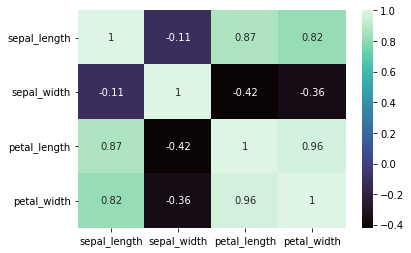

In [19]:
sn.heatmap(train.corr(),annot=True, cmap='mako')

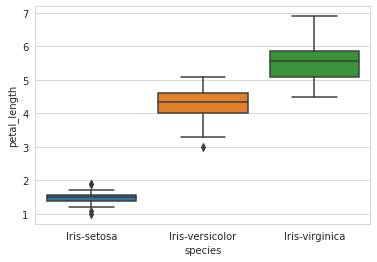

In [26]:
sn.set_style('whitegrid')
sn.boxplot(x="species", y="petal_length", data=train)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


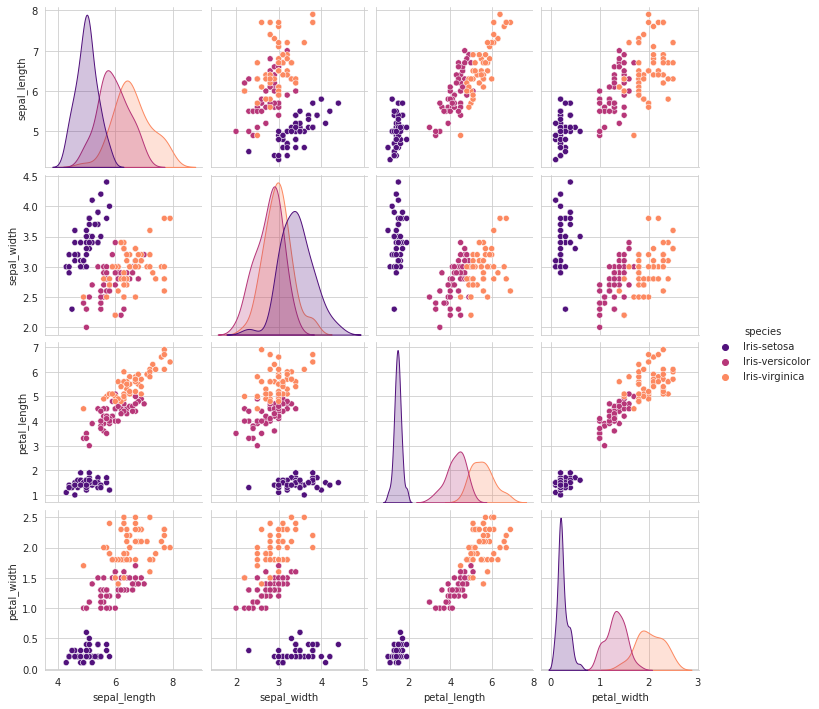

In [28]:
sn.set_style('whitegrid')
sn.pairplot(train, hue = 'species', palette = 'magma')

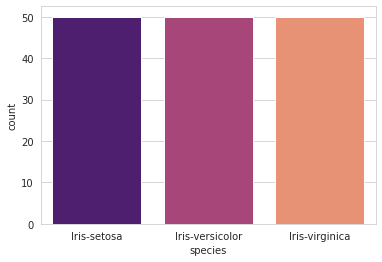

In [29]:
sn.countplot(x = 'species', data = train, palette = 'magma')

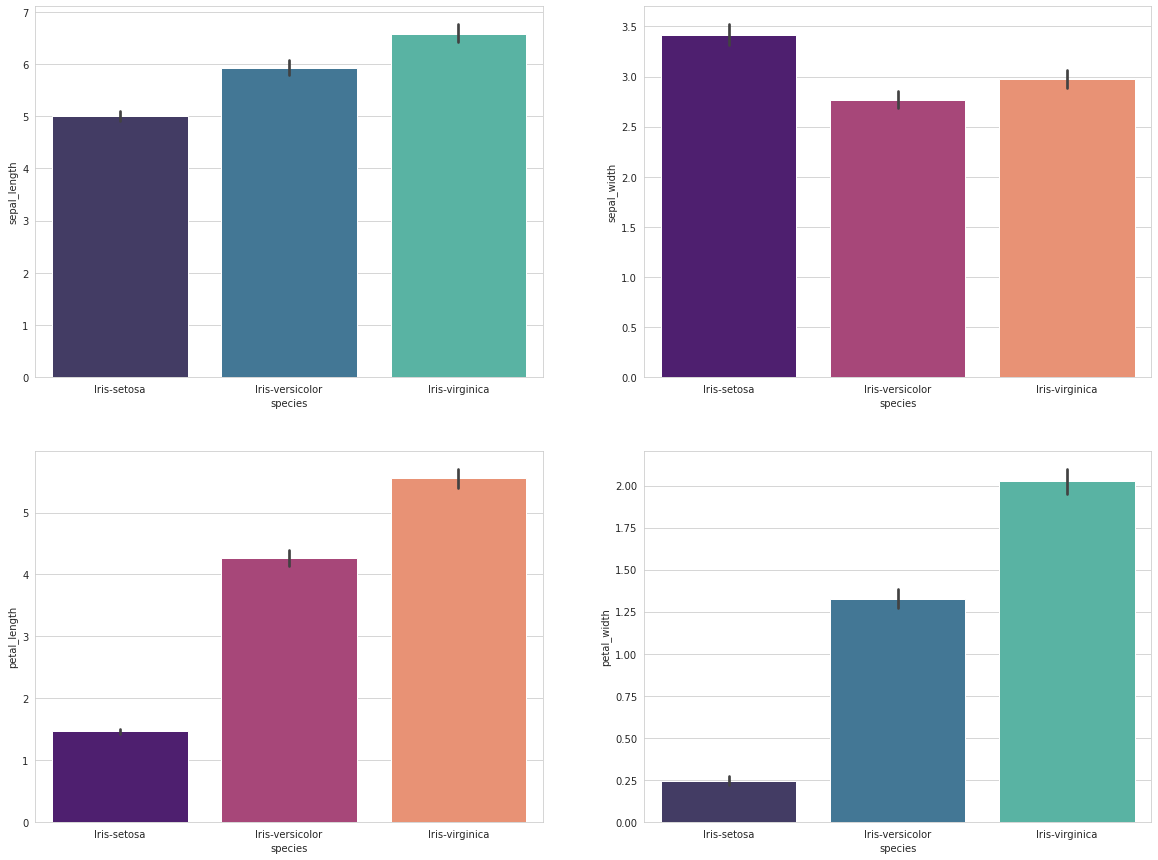

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sn.barplot(x = 'species', y = 'sepal_length', data = train, palette="mako")
plt.subplot(2,2,2)
sn.barplot(x = 'species', y = 'sepal_width', data = train, palette="magma")
plt.subplot(2,2,3)
sn.barplot(x = 'species', y = 'petal_length', data = train, palette="magma")
plt.subplot(2,2,4)
sn.barplot(x = 'species', y = 'petal_width', data = train, palette="mako")

**Standardisation**

In [34]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [35]:
scalar.fit(train.drop('species',axis=1))

StandardScaler()

In [36]:
scaled_features = scalar.transform(train.drop('species',axis=1))

In [37]:
train1 = pd.DataFrame(scaled_features,columns=train.columns[:-1])
train1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


***Train test Split***

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['species'],
                                                    test_size=0.30)

***Using kNN Classifier***

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
import numpy as np
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

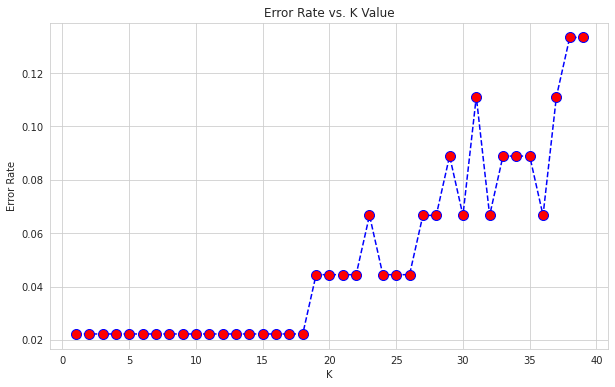

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above graph, 'K=7' seems to a good value to use 

***Testing the model***

In [48]:
knn= KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [49]:
Predicted_types=knn.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Predicted_types)

0.9777777777777777

At K=7, the accuracy score is 97.77% which is really good

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,Predicted_types))
print('\n')
print(classification_report(y_test,Predicted_types))

WITH K=7


[[13  0  0]
 [ 0 17  0]
 [ 0  1 14]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# **So, from the classification method we can see that we get 98% accuracy from our model. This concludes the EDA and model (training, prediction).**